# Vasant Dave
# O41154429
# April 3 ,2024

Goal of this notebook: Using Machine learing(Algorithm: Random forest regression) to Analyse the generated data of player statistics and predict what score they will achieve based on past statistics. Random forest regression used as complexity of the variables is correlated and RFR model is robust to outliers.
The variables used for prediction are 'Bird_Position', 'Bird_Velocity', 'Horizontol_Distance', 'Vertical_Distance_Bottom', 'Vertical_Distance_Top', 'How many collisions'. Near Maximum accuracy (around 90%).

This note book relies on the csv file generated from the Flappy bird milestone 2 file

In [ ]:
#If working with them for the first time
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib

In [2]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
#Whatever the csv has been created can check the directory and mention it here
df = pd.read_csv('C://Users//Vasan//#Bi programming//flappy_bird_VASANT.csv')

In [4]:
#Top rows of the table
df.head()

,Bird_Pos,Bird_Vel,Horiz_Dist,Vert_Dist_Top,Vert_Dist_Bottom,Collision,Score
0,400.25,0.25,947,4.25,171.75,0,0
1,400.25,0.25,1247,144.25,31.75,0,0
2,400.25,0.25,1547,-118.75,294.75,0,0
3,400.75,0.50,944,4.75,171.25,0,0
4,400.75,0.50,1244,144.75,31.25,0,0


In [5]:
#Bottom rows of the csv 
df.tail()

,Bird_Pos,Bird_Vel,Horiz_Dist,Vert_Dist_Top,Vert_Dist_Bottom,Collision,Score
8138,771.0,12.5,833,702.0,-526.0,0,3
8139,771.0,12.5,1031,613.0,-437.0,0,3
8140,775.0,0.0,629,635.0,-459.0,0,3
8141,775.0,0.0,830,706.0,-530.0,0,3
8142,775.0,0.0,1028,617.0,-441.0,0,3


In [6]:
#Overall info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bird_Pos          8143 non-null   float64
 1   Bird_Vel          8143 non-null   float64
 2   Horiz_Dist        8143 non-null   int64  
 3   Vert_Dist_Top     8143 non-null   float64
 4   Vert_Dist_Bottom  8143 non-null   float64
 5   Collision         8143 non-null   int64  
 6   Score             8143 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 445.4 KB


In [7]:
#Check average score the player has gotten using mean
df.describe()

,Bird_Pos,Bird_Vel,Horiz_Dist,Vert_Dist_Top,Vert_Dist_Bottom,Collision,Score
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.0,8143.000000
mean,461.163453,0.422203,584.191576,130.282206,45.717794,0.0,1.818986
std,106.740055,3.976865,372.976505,165.828849,165.828849,0.0,2.436398
min,141.000000,-4.750000,-95.000000,-343.000000,-543.000000,0.0,0.000000
25%,410.500000,-2.750000,270.500000,34.500000,-63.875000,0.0,0.000000
50%,472.000000,-0.500000,605.000000,109.500000,66.500000,0.0,0.000000
75%,531.000000,2.750000,890.000000,239.875000,141.500000,0.0,3.000000
max,775.000000,14.000000,1547.000000,719.000000,519.000000,0.0,9.000000


In [10]:
#Unique score values to verify the score validation
df['Score'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
#Maximum score the player has achieved
print(max(df['Score']))

9


Will take a minute to train the model depending on the computer

Actual Score	Predicted Score
0		0.0
0		0.03
0		0.43
6		5.46
4		3.82
3		2.72
2		2.27
0		0.0
0		0.0
8		4.26
Average Predicted Score: 1.84
Root Mean Squared Error (RMSE): 0.6786735519049263
Mean Squared error: 0.4605977900552487
R-squared (R2) score: 0.9211282178424827


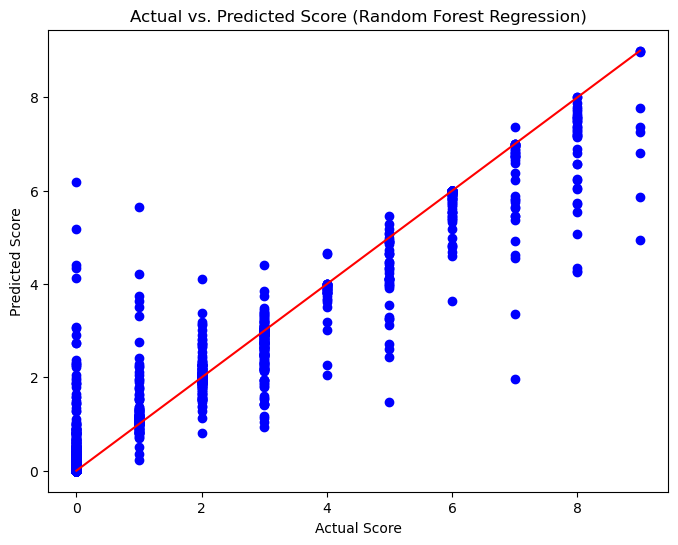

In [11]:
# Import necessary libraries for data processing, visualization, and machine learning
# Pandas for data manipulation
# Matplotlib for plotting
# Train test split and RandomForestRegressor from scikit-learn for building and evaluating the regression model
# Mean squared error and R-squared score metrics for evaluation

# Read the CSV file containing the game data into a Pandas DataFrame

# Define features (X) and target variable (y) for regression
# Features include bird position, velocity, distances to pipes, collision status
# Target variable is the score achieved in the game

# Split the dataset into training and testing sets for model evaluation
# 80% of the data is used for training and 20% for testing

# Initialize a RandomForestRegressor model with 100 estimators and fit it to the training data

# Predict the scores on the test set using the trained model

# Display a sample of actual vs. predicted scores from the test set

# Calculate and display the average predicted score, root mean squared error (RMSE), and R-squared (R2) score

# Visualize the actual vs. predicted scores using a scatter plot
# Plot the diagonal line for reference, where actual score equals predicted score
# Show the plot

# The code performs regression analysis on Flappy Bird game data, predicting scores based on various game parameters.
# It evaluates the model's performance using RMSE and R2 score, and visualizes the predictions using a scatter plot







import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



data = pd.read_csv('C://Users//Vasan//#Bi programming//flappy_bird_VASANT.csv')


X = data[['Bird_Pos', 'Bird_Vel', 'Horiz_Dist', 'Vert_Dist_Bottom', 'Vert_Dist_Top', 'Collision']]
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


num_samples = 10


print("Actual Score\tPredicted Score")
for i in range(num_samples):
    print(f"{y_test.iloc[i]}\t\t{y_pred[i]}")

    
    
average_predicted_score = sum(y_pred) / len(y_pred)
print(f"Average Predicted Score: {average_predicted_score:.2f}")

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared error: {mse}")
print(f"R-squared (R2) score: {r2}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score (Random Forest Regression)')
plt.show()